In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [137]:
df = pd.read_csv('heart.csv')

In [138]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
#df.info()

In [153]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.757007,246.474495,0.148515,0.528053,149.799926,0.326733,2.156448,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.133245,126.210468,0.000000,0.000000,71.153061,0.000000,1.116844,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.133245,211.210468,0.000000,0.000000,133.653061,0.000000,1.116844,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.133245,240.210468,0.000000,1.000000,153.153061,0.000000,1.916844,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.133245,274.710468,0.000000,1.000000,166.153061,1.000000,2.716844,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.133245,564.210468,1.000000,2.000000,202.153061,1.000000,7.316844,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

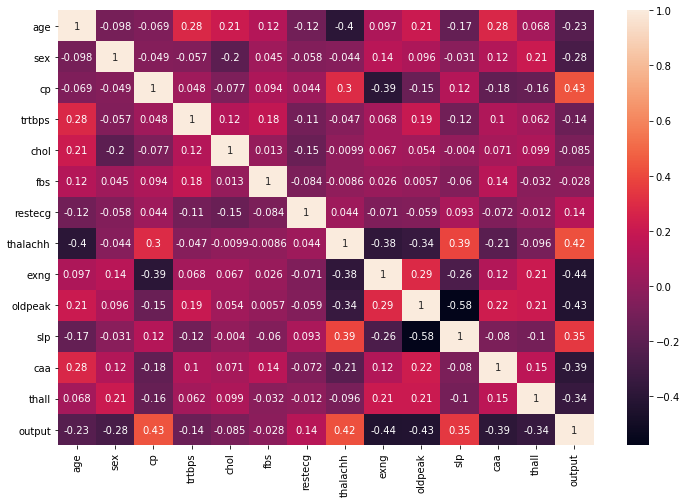

In [163]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True)

#### Preprocessing

In [157]:
from sklearn import preprocessing 
from sklearn import impute
from sklearn import pipeline 
np.random.seed(0)

In [143]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
def data_enhancement(data):
    gen_data = data
    
    trtbps_std = data['trtbps'].std() / data['trtbps'].mean()
    chol_std = data['chol'].std() / data['chol'].mean()
    thalachh_std = data['thalachh'].std() / data['thalachh'].mean()
    oldpeak_std = data['oldpeak'].std() / data['oldpeak'].mean()
    
    if np.random.randint(2) == 1:
        gen_data['trtbps'] += trtbps_std
    else:
        gen_data['trtbps'] -= trtbps_std
        
    if np.random.randint(2) == 1:
        gen_data['chol'] += chol_std
    else:
        gen_data['chol'] -= chol_std
        
    if np.random.randint(2) == 1:
        gen_data['thalachh'] += thalachh_std
    else:
        gen_data['thalachh'] -= thalachh_std
        
    if np.random.randint(2) == 1:
        gen_data['oldpeak'] += oldpeak_std
    else:
        gen_data['oldpeak'] -= oldpeak_std
    return gen_data

In [162]:
df2 = data_enhancement(df)
df2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.133514,233.631044,1,0,150.763748,0,2.920092,0,0,1,1
1,37,1,2,130.133514,250.631044,0,1,187.763748,0,4.120092,0,0,2,1
2,41,0,1,130.133514,204.631044,0,0,172.763748,0,2.020092,2,0,2,1
3,56,1,1,120.133514,236.631044,0,1,178.763748,0,1.420092,2,0,2,1
4,57,0,0,120.133514,354.631044,0,1,163.763748,1,1.220092,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.133514,241.631044,0,1,123.763748,1,0.820092,1,0,3,0
299,45,1,3,110.133514,264.631044,0,1,132.763748,0,1.820092,1,0,3,0
300,68,1,0,144.133514,193.631044,1,1,141.763748,0,4.020092,1,2,3,0
301,57,1,0,130.133514,131.631044,0,1,115.763748,1,1.820092,1,1,3,0


In [118]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
from sklearn.preprocessing import StandardScaler
scaler_Models = pipeline.Pipeline(steps=[('scaling' , StandardScaler())])

In [146]:
x = df.drop('output', axis=1)
y = df.output

In [151]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape

(212, 13)

In [152]:
extra_sample = df2.sample(df2.shape[0] // 4)
x_train = pd.concat([x_train, extra_sample.drop(['output'], axis=1 ) ])
y_train = pd.concat([y_train, extra_sample['output'] ])
x_train.shape


(287, 13)

In [176]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from sklearn.svm           import SVC
from sklearn.neighbors     import KNeighborsClassifier

classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "LogReg":        LogisticRegression(),
  "SVM":           SVC(),
  "KNN":           KNeighborsClassifier(n_neighbors=2)
}
#classifiers = {name: pipeline.make_pipeline(scaler_Models, model) for name, model in tree_classifiers.items()}

In [177]:
import time
from sklearn import metrics

In [178]:
results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], " % error": [], 'Time': []})

rang = abs(y_train.max()) - abs(y_train.min())

for model_name, model in classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test)
    
    results = results.append({"Model":    model_name,
                              "MSE": metrics.mean_squared_error(y_test, pred),
                              "MAB": metrics.mean_absolute_error(y_test, pred),
                              " % error": metrics.mean_squared_error(y_test, pred) / rang,
                              "Accuracy Score": model.score(x_test,y_test),
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAB'], vmin=0, vmax=100, color='#5fba7d')


C:\Users\rujek\Anaconda3\envs\strive\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rujek\Anaconda3\envs\strive\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[16:22:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,MSE,MAB,% error,Time,Accuracy Score
1,Extra Trees,0.087912,0.087912,0.087912,0.138792,0.912088
2,Skl GBM,0.109890,0.109890,0.109890,0.095796,0.890110
3,LightGBM,0.109890,0.109890,0.109890,0.042863,0.890110
4,AdaBoost,0.120879,0.120879,0.120879,0.150895,0.879121
5,Random Forest,0.131868,0.131868,0.131868,0.155160,0.868132
6,XGBoost,0.153846,0.153846,0.153846,0.077700,0.846154
7,Decision Tree,0.175824,0.175824,0.175824,0.005008,0.824176
8,LogReg,0.197802,0.197802,0.197802,0.043057,0.802198
9,SVM,0.340659,0.340659,0.340659,0.008950,0.659341
10,KNN,0.362637,0.362637,0.362637,0.004557,0.637363
